In [39]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 제주도 공공홈페이지에서 얻어온 음식점 리스트를 이용해 데이터프레임을 만들었다.
**기준**
1. 현재 영업중일 것 - 제주도에서 올린 자료는 21년도 7월기준으로 현재 작성시점인 22년 8월에 비교하면 약 1년 전 데이터이다. 20년도부터 코로나의 여파로 폐업하는 가게들이 많아졌는데 특히 관광지인 제주도는 여행객이 줄어들어 폐업하는 가게가 더 많을 것으로 생각된다. 

2. 맛집? 평가는 빅데이터로 
> - 여행지 음식점(식당,카페)의 경우 살고있는 주변음식점보다 리뷰와 별점이 더 많이 달린다. 리뷰를 작성하면서 추억을 글로 남기나 보다. 
> - **리뷰가 많을수록, 별점이 높을수록 좋은 식당?** 
>> 이 부분에 대해서는 한 번 의심해 볼 필요가 있다. 주변 음식점은 리뷰이벤트 등을 통해 마케팅을 하는 반면 여행지는 어떠할까? -> 제주도 여행가서 직접 확인해 봐야겠다.
> - 네이버 리뷰 50개 이상/ 별점 3.7점이상/ 다음 리뷰 30개이상/ 별점 3.5점이상
3. 카카오 맵 / 네이버 맵 
> 이번에 작업하면서 두가지 맵을 이용했다. 상대적으로 메인 플랫폼인 네이버가 리뷰수, 별점 등 압도적으로 우위를 점치고 있다. 그렇기 때문에 네이버의 신뢰성이 떨어질 수 있다. 

>> - 크롤링 작업하면서 오류가 많았다. 카카오맵은 수월하게 작동하는 반면 네이버는 300회 이상 넘어가면 제대로 크롤링이 되지 않는 치명적인 오류가 발생했다.
나는 잠을 줄여가며 수동으로 크롤링을 돌렸다. (커피를 몇 잔 마셨을까)


그렇게 만들어진 데이터를 가지고 **지금부터 분석을 해보려고 한다**

In [40]:
import pandas as pd 

In [41]:
jeju = pd.read_csv('/content/drive/MyDrive/jeju/git_jeju/jeju_final.csv')

In [42]:
def change_category(foodname,to_category):
  temp = [] 
  for i in range(len(jeju)):
    if foodname in jeju.loc[i]['사업장명']: 
      temp.append(i)
  a =jeju['업종구분소분류'].copy()
  a[temp] = to_category
  jeju['업종구분소분류'] = a 
  return jeju

In [43]:
jeju.head()

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
0,카페송키,카페,제주특별자치도 제주시 삼도이동 1120-2,"제주특별자치도 제주시 무근성안길 16, 1층 (삼도이동)",45,4.3,93,4.58,제주시,제주,33.515141,126.520192
1,스톤아일랜드탭하우스,호프,제주특별자치도 제주시 연동 280-37,"제주특별자치도 제주시 삼무로7길 16, 1층 (연동)",44,4.5,147,4.47,제주시,제주,33.492461,126.493268
2,와르다레스토랑,양식,제주특별자치도 제주시 삼도이동 148-3,"제주특별자치도 제주시 관덕로8길 24-1, 1층 (삼도이동)",42,4.7,135,4.69,제주시,제주,33.511042,126.523110
3,제주마당,해산물,제주특별자치도 제주시 이호일동 663-1,"제주특별자치도 제주시 도리로 50, 2층 (이호일동)",161,3.9,1224,4.35,제주시,제주,33.498230,126.458121
4,공산명월,카페,제주특별자치도 제주시 애월읍 광령리 2611-1,"제주특별자치도 제주시 애월읍 광령평화3길 18, 1층",58,4.6,183,4.60,제주시,애월,33.447199,126.433182


In [44]:
jeju.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사업장명       3193 non-null   object 
 1   업종구분소분류    3193 non-null   object 
 2   소재지전체주소    3193 non-null   object 
 3   도로명전체주소    3193 non-null   object 
 4   Reviews    3193 non-null   int64  
 5   stars      3193 non-null   float64
 6   n_reviews  3193 non-null   int64  
 7   n_stars    3193 non-null   float64
 8   소재지        3193 non-null   object 
 9   법정동        3193 non-null   object 
 10  위도         3193 non-null   float64
 11  경도         3193 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 299.5+ KB


In [45]:
jeju.업종구분소분류.unique()

array(['카페', '호프', '양식', '해산물', '고기', '한식', '분식', '중식', '일식', '경양식',
       '외국요리', '뷔페', '패스트푸드', '푸드트럭'], dtype=object)

In [46]:
jeju.법정동.unique()

array(['제주', '애월', '조천', '추자도', '구좌', '한림', '한경', '우도', '서귀포', '안덕', '성산',
       '대정', '중문', '표선', '남원'], dtype=object)

## 제주도 (음식점 / 카페) 리스트 총 3193개 
****
- 사업장명 **영업점이름**
****
- 업종구분소분류 = 총 14개로 구분
> - 카페 
> - 호프
> - 양식 
> - 해산물
> - 고기
> - 한식
> - 분식
> - 중식
> - 일식
> - 경양식 
> - 외국요리
> - 패스트푸드
> - 뷔페
> - 푸드트럭
****
- 소재지전체주소 / 구주소
- 도로명전체주소 / 신주소
****
- Reviews   - **kakomap  리뷰수**
- stars     - **kakomap  별점 5점만점**
- n_reviews - **navermap 리뷰수**
- n_stars   - **navermap 별점 5점만점**
****
- 소재지  
> - 제주시
> - 서귀포시 
****
- 법정동  = 총 15개로 구분
> - 제주
> - 애월
> - 조천
> - 추자도
> - 구좌
> - 한림
> - 한경
> - 우도
> - 서귀포
> - 안덕
> - 성산
> - 대정
> - 중문
> - 표선 
> - 남원

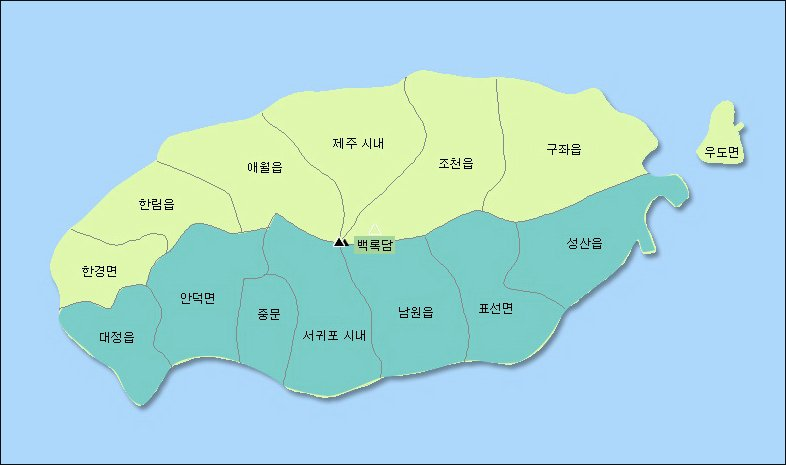

****
- 위도 - 좌표계설정
- 경도 - 좌표계설정 

In [47]:
jeju.groupby('법정동')['사업장명'].count()

법정동
구좌      217
남원       62
대정       95
서귀포     308
성산      168
안덕      144
애월      201
우도       43
제주     1319
조천      180
중문      147
추자도       4
표선       73
한경       65
한림      167
Name: 사업장명, dtype: int64

## 제주시의 인구가 서귀포시의 인구에 약 2.7배정도이다.

- 그렇다면 리뷰와 별점으로 분류된 데이터에서도 제주시 음식점 수와 서귀포시 음식점 수가 비슷하게 차이가 날까??

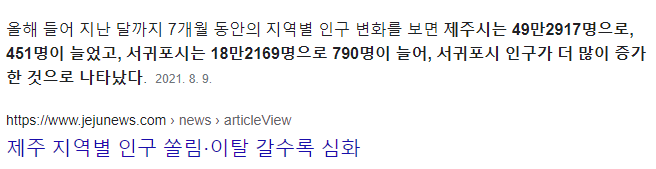

In [48]:
jeju.groupby('소재지')['사업장명'].count() # 약 2.2배 차이나는 것을 볼 수 있다.

소재지
서귀포시    1002
제주시     2191
Name: 사업장명, dtype: int64

## 제주시와 서귀포시의 인구차이만큼 
음식점의 수도 차이가 나는것을 볼 수 있었다. 제주시가 서귀포시보다 더 발달되어 있고 인구도 많기 때문에 당연히 많이 있을수 밖에 없다 라고 생각된다. 
하지만 제주시와 추자도/우도를 제외하면 크게 차이가 나지 않다로 보이는데 지역마다 괜찮은 맛집들이 즐비해 있는것을 볼 수 있다. 

**그렇다면 특정 지역을 선택하면 랜덤으로 음식점이나 카페를 추천하는 알고리즘을 만들 수 있지 않을까?** - 도전과제 1

In [49]:
import random

loc = input(f'지역을 입력해주세요 : {jeju.법정동.unique()} => ')
choose = jeju[jeju.법정동 == loc]
random_c = random.randrange(1,len(choose))
print(choose.iloc[random_c])

지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 한림
사업장명                             금악정육식당
업종구분소분류                              고기
소재지전체주소       제주특별자치도 제주시 한림읍 금악리 2138 
도로명전체주소      제주특별자치도 제주시 한림읍 중산간서로 4302
Reviews                              15
stars                               4.1
n_reviews                           172
n_stars                            4.59
소재지                                 제주시
법정동                                  한림
위도                            33.359039
경도                           126.294171
Name: 2538, dtype: object


In [50]:
jeju[jeju.columns[:4]]=jeju[jeju.columns[:4]].astype(str)

In [51]:
a=1
while(a!=2):
  loc = input(f'지역을 입력해주세요 : {jeju.법정동.unique()} => ')
  while loc not in jeju.법정동.unique():
    loc = input(f'지역을 다시 입력해주세요 : {jeju.법정동.unique()} => ')
  select_loc = jeju[jeju.법정동==loc]
  print('----------------------------------------')
  print(f'선택하신 지역의 카테고리와 음식점 수 입니다.')
  print('----------------------------------------')
  print(select_loc.groupby('업종구분소분류')['사업장명'].count())
  print('----------------------------------------')
  food = input(f'카테고리를 선택해주세요 : {jeju.업종구분소분류.unique()} => ')
  while food not in jeju[jeju.법정동==loc]['업종구분소분류'].unique():
    food = input(f'해당 지역에는 선택한 카테고리가 없습니다. 다시입력해주세요 : {jeju.업종구분소분류.unique()} => ')
  choose = jeju[(jeju.법정동 == loc )&(jeju.업종구분소분류==food)]
  random_c = random.randrange(0,len(choose))
  print(choose.iloc[random_c]) 
  a = 2


지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 제주
----------------------------------------
선택하신 지역의 카테고리와 음식점 수 입니다.
----------------------------------------
업종구분소분류
경양식       41
고기       143
분식        27
뷔페         5
양식        23
외국요리       8
일식        54
중식        40
카페       284
패스트푸드     29
푸드트럭       6
한식       495
해산물       64
호프       100
Name: 사업장명, dtype: int64
----------------------------------------
카테고리를 선택해주세요 : ['카페' '호프' '양식' '해산물' '고기' '한식' '분식' '중식' '일식' '경양식' '외국요리' '뷔페' '패스트푸드'
 '푸드트럭'] => 카페
사업장명                                      쿠잉
업종구분소분류                                   카페
소재지전체주소              제주특별자치도 제주시 노형동 1027-1 
도로명전체주소      제주특별자치도 제주시 월랑북길 37, 102호 (노형동)
Reviews                                    0
stars                                    5.0
n_reviews                                 88
n_stars                                 4.63
소재지                                      제주시
법정동                          

In [52]:
# 랜덤 점심/카페/저녁 추천  
def lucadi(): # Lunch cafe dinner 루카디 
  loc_list = [] 
  while (len(loc_list)<3):
    loc1 = input(f'점심먹을 지역을 입력해주세요 : {jeju.법정동.unique()} => ')
    while loc1 not in jeju.법정동.unique():
      loc1 = input(f'점심 지역을 다시 지정해주세요 : {jeju.법정동.unique()} => ')
    loc_list.append(loc1)
    loc2 = input(f'어느지역의 카페를 가실건가요? 원치않으면 X를 입력해주세요 : {jeju.법정동.unique()} => ')
    if (loc2 == 'X')|(loc2=='x'):
      loc_list.append('X')
    else:
      while (loc2 not in jeju.법정동.unique()) & (loc2 != 'X') & (loc2 != 'x' ):
        loc2 = input(f'어느지역의 카페를 가실건가요? 원치않으면 X를 입력해주세요 : {jeju.법정동.unique()} => ')
      if (loc2 == 'X')|(loc2=='x'):
        loc_list.append('X')
      else:
        loc_list.append(loc2)
    loc3 = input(f'저녁먹을 지역을 입력해주세요 : {jeju.법정동.unique()} => ')
    while loc3 not in jeju.법정동.unique():
      loc3 = input(f'저녁식사 지역을 다시 입력해주세요 : {jeju.법정동.unique()} => ')
    loc_list.append(loc3)
  for loc in range(len(loc_list)):
    if loc != 1: 
      choose_loc = jeju[(jeju.법정동==loc_list[loc])&(jeju.업종구분소분류!='카페')]
    else:
      if loc_list[loc] == 'X':
        print('카페는 패스')
      else:
         choose_loc = jeju[(jeju.법정동==loc_list[loc])&(jeju.업종구분소분류=='카페')]
    random_food = random.randrange(0,len(choose_loc))
    print(choose_loc.iloc[random_food])

In [53]:
lucadi()

점심먹을 지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 제주
어느지역의 카페를 가실건가요? 원치않으면 X를 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 조천
저녁먹을 지역을 입력해주세요 : ['제주' '애월' '조천' '추자도' '구좌' '한림' '한경' '우도' '서귀포' '안덕' '성산' '대정' '중문' '표선'
 '남원'] => 성산
사업장명                                        통김치찌개
업종구분소분류                                        한식
소재지전체주소                      제주특별자치도 제주시 노형동 943 
도로명전체주소      제주특별자치도 제주시 원노형10길 20, 1층 105호 (노형동)
Reviews                                         6
stars                                         3.9
n_reviews                                     144
n_stars                                      4.33
소재지                                           제주시
법정동                                            제주
위도                                      33.484499
경도                                      126.48587
Name: 1925, dtype: object
사업장명                                    다니쉬
업

In [ ]:
jeju[jeju.업종구분소분류=='패스트푸드'] # 패스트 푸드 삭제시킬까 .. 

## 추천 시스템을 가볍게 만들어 보았다.

# 제주도에서 가장 리뷰가 많은 곳은 어디일까???

In [54]:
# 네이버 맵 기준 
print('네이버맵\n',jeju.loc[jeju.n_reviews.argmax()])
# 카카오 맵 기준 
print('카카오맵\n',jeju.loc[jeju.Reviews.argmax()])

네이버맵
 사업장명                                 우진해장국
업종구분소분류                                 한식
소재지전체주소              제주특별자치도 제주시 삼도이동 831 
도로명전체주소      제주특별자치도 제주시 서사로 11, 1층 (삼도이동)
Reviews                               2118
stars                                  3.7
n_reviews                            13202
n_stars                               4.41
소재지                                    제주시
법정동                                     제주
위도                               33.511522
경도                              126.520039
Name: 291, dtype: object
카카오맵
 사업장명                                 우진해장국
업종구분소분류                                 한식
소재지전체주소              제주특별자치도 제주시 삼도이동 831 
도로명전체주소      제주특별자치도 제주시 서사로 11, 1층 (삼도이동)
Reviews                               2118
stars                                  3.7
n_reviews                            13202
n_stars                               4.41
소재지                                    제주시
법정동                                     제주
위도               

## 이럴수가.. 우진해장국이 카카오,네이버 모두 이관왕을 차지했다. 

10개씩 확인해 보자 

In [55]:
# 네이버 TOP 10 
jeju.loc[jeju.n_reviews.sort_values(ascending=False)[:10].index] 

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
291,우진해장국,한식,제주특별자치도 제주시 삼도이동 831,"제주특별자치도 제주시 서사로 11, 1층 (삼도이동)",2118,3.7,13202,4.41,제주시,제주,33.511522,126.520039
1144,고집돌우럭 중문,한식,제주특별자치도 서귀포시 색달동 2351,"제주특별자치도 서귀포시 일주서로 879, 2층 (색달동)",1568,4.9,12348,4.77,서귀포시,중문,33.257915,126.416824
860,이춘옥의원조고등어쌈밥,한식,제주특별자치도 제주시 애월읍 하귀1리 266-1 (1층),"제주특별자치도 제주시 애월읍 일주서로 7213, 1층",1140,4.4,10611,4.62,제주시,애월,33.488965,126.418637
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
2360,조천항아리식당,한식,제주특별자치도 제주시 조천읍 조천리 2532,제주특별자치도 제주시 조천읍 신북로 225,150,4.7,8437,4.79,제주시,조천,33.536164,126.636897
1684,이니스프리제주하우스,카페,제주특별자치도 서귀포시 안덕면 서광리 1235-1,"제주특별자치도 서귀포시 안덕면 신화역사로 15, 1층",327,4.3,7998,4.55,서귀포시,안덕,33.306100,126.290529
1602,스타벅스제주함덕,카페,제주특별자치도 제주시 조천읍 함덕리 1004-27,"제주특별자치도 제주시 조천읍 조함해안로 522, 1~2층",261,3.9,7428,4.45,제주시,조천,33.542496,126.668699
2891,엔제리너스제주공항국내선탑승,카페,제주특별자치도 제주시 용담이동 2002 외3필지 여객청사(2층),"제주특별자치도 제주시 공항로 2 (용담이동, 여객청사)",0,0.0,7198,4.27,제주시,제주,33.505936,126.495951
720,고집돌우럭함덕,한식,제주특별자치도 제주시 조천읍 함덕리 1020-2,"제주특별자치도 제주시 조천읍 신북로 491-9, 2층",910,4.9,6407,4.76,제주시,조천,33.543862,126.663020
450,문개항아리애월,한식,제주특별자치도 제주시 애월읍 하귀2리 2701-1,제주특별자치도 제주시 애월읍 가문동길 38,75,4.5,6343,4.82,제주시,애월,33.485782,126.392407


In [56]:
# 카카오 TOP 10
jeju.loc[jeju.Reviews.sort_values(ascending=False)[:10].index]

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
291,우진해장국,한식,제주특별자치도 제주시 삼도이동 831,"제주특별자치도 제주시 서사로 11, 1층 (삼도이동)",2118,3.7,13202,4.41,제주시,제주,33.511522,126.520039
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
1144,고집돌우럭 중문,한식,제주특별자치도 서귀포시 색달동 2351,"제주특별자치도 서귀포시 일주서로 879, 2층 (색달동)",1568,4.9,12348,4.77,서귀포시,중문,33.257915,126.416824
116,고집돌우럭제주공항,한식,제주특별자치도 제주시 건입동 1319-124,제주특별자치도 제주시 임항로 30 (건입동),1245,4.8,5428,4.71,제주시,제주,33.516308,126.528064
1030,형제도식당,한식,"제주특별자치도 서귀포시 색달동 2273-1 , 1층","제주특별자치도 서귀포시 일주서로 915, 1층 (색달동)",1229,4.5,1434,4.66,서귀포시,중문,33.257788,126.412734
520,해성도뚜리,한식,제주특별자치도 제주시 애월읍 구엄리 1258,제주특별자치도 제주시 애월읍 애월해안로 682,1150,3.6,1218,4.45,제주시,애월,33.481805,126.375038
860,이춘옥의원조고등어쌈밥,한식,제주특별자치도 제주시 애월읍 하귀1리 266-1 (1층),"제주특별자치도 제주시 애월읍 일주서로 7213, 1층",1140,4.4,10611,4.62,제주시,애월,33.488965,126.418637
853,은혜전복,한식,제주특별자치도 제주시 애월읍 애월리 2528,"제주특별자치도 제주시 애월읍 애월로1길 24-3, 1층",1011,3.8,2256,4.49,제주시,애월,33.462966,126.310173
1367,카페바나나중문,카페,제주특별자치도 서귀포시 색달동 2353,제주특별자치도 서귀포시 일주서로 875 (색달동),982,4.8,2322,4.75,서귀포시,중문,33.258022,126.417179
720,고집돌우럭함덕,한식,제주특별자치도 제주시 조천읍 함덕리 1020-2,"제주특별자치도 제주시 조천읍 신북로 491-9, 2층",910,4.9,6407,4.76,제주시,조천,33.543862,126.663020


In [57]:
## 카카오, 네이버 맵 top10 중 겹치는 곳 
k_10 = set(jeju.Reviews.sort_values(ascending=False)[:10].index) 
n_10 = set(jeju.n_reviews.sort_values(ascending=False)[:10].index)
jeju.loc[list(n_10 -(n_10-k_10))]

,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
291,우진해장국,한식,제주특별자치도 제주시 삼도이동 831,"제주특별자치도 제주시 서사로 11, 1층 (삼도이동)",2118,3.7,13202,4.41,제주시,제주,33.511522,126.520039
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
720,고집돌우럭함덕,한식,제주특별자치도 제주시 조천읍 함덕리 1020-2,"제주특별자치도 제주시 조천읍 신북로 491-9, 2층",910,4.9,6407,4.76,제주시,조천,33.543862,126.663020
1144,고집돌우럭 중문,한식,제주특별자치도 서귀포시 색달동 2351,"제주특별자치도 서귀포시 일주서로 879, 2층 (색달동)",1568,4.9,12348,4.77,서귀포시,중문,33.257915,126.416824
860,이춘옥의원조고등어쌈밥,한식,제주특별자치도 제주시 애월읍 하귀1리 266-1 (1층),"제주특별자치도 제주시 애월읍 일주서로 7213, 1층",1140,4.4,10611,4.62,제주시,애월,33.488965,126.418637


In [142]:
jeju.to_csv('/content/drive/MyDrive/jeju/git_jeju/jejudo.csv',index=False)

In [82]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 

카카오,네이버 리뷰 top 5


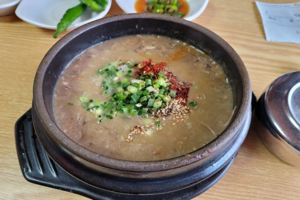

'우진해장국'

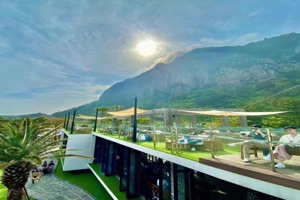

'원앤온리'

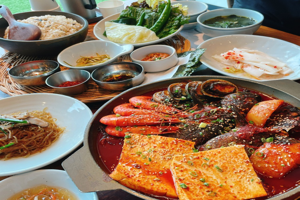

'고집돌우럭함덕'

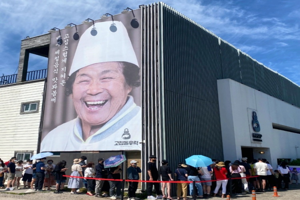

'고집돌우럭중문'

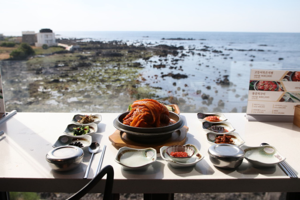

'이춘옥의원조고등어쌈밥'

In [85]:
img1 = Image.open('/content/drive/MyDrive/jeju/pic_data/woojin.jfif')
img2 = Image.open('/content/drive/MyDrive/jeju/pic_data/oneand.jfif')
img3 = Image.open('/content/drive/MyDrive/jeju/pic_data/gozib_hd.jfif')
img4 = Image.open('/content/drive/MyDrive/jeju/pic_data/gozib_jm.jfif')
img5 = Image.open('/content/drive/MyDrive/jeju/pic_data/leeco.jfif')
img1 = img1.resize((300,200))
img2 =img2.resize((300,200))
img3 =img3.resize((300,200))
img4 =img4.resize((300,200))
img5 =img5.resize((300,200))
print('카카오,네이버 리뷰 top 5')
display(img1,'우진해장국'),display(img2,'원앤온리'),display(img3,'고집돌우럭함덕'),display(img4,'고집돌우럭중문'),display(img5,'이춘옥의원조고등어쌈밥')
print('')

## 카페 한정 리뷰 가장 많은 곳 top 10 

In [93]:
# 네이버 TOP 10 
jeju.loc[jeju[jeju['업종구분소분류']=='카페']['n_reviews'].sort_values(ascending=False)[:10].index]


,사업장명,업종구분소분류,소재지전체주소,도로명전체주소,Reviews,stars,n_reviews,n_stars,소재지,법정동,위도,경도
1092,원앤온리,카페,제주특별자치도 서귀포시 안덕면 사계리 86,제주특별자치도 서귀포시 안덕면 산방로 141,1844,4.0,9406,4.34,서귀포시,안덕,33.239193,126.319390
1684,이니스프리제주하우스,카페,제주특별자치도 서귀포시 안덕면 서광리 1235-1,"제주특별자치도 서귀포시 안덕면 신화역사로 15, 1층",327,4.3,7998,4.55,서귀포시,안덕,33.306100,126.290529
1602,스타벅스제주함덕,카페,제주특별자치도 제주시 조천읍 함덕리 1004-27,"제주특별자치도 제주시 조천읍 조함해안로 522, 1~2층",261,3.9,7428,4.45,제주시,조천,33.542496,126.668699
2891,엔제리너스제주공항국내선탑승,카페,제주특별자치도 제주시 용담이동 2002 외3필지 여객청사(2층),"제주특별자치도 제주시 공항로 2 (용담이동, 여객청사)",0,0.0,7198,4.27,제주시,제주,33.505936,126.495951
2795,우유부단,카페,제주특별자치도 제주시 한림읍 금악리 142-2,"제주특별자치도 제주시 한림읍 금악동길 38, 1층",187,2.9,4545,4.32,제주시,한림,33.347666,126.328231
1676,스타벅스커피성산일출봉,카페,제주특별자치도 서귀포시 성산읍 성산리 109-11,제주특별자치도 서귀포시 성산읍 일출로 284-5,147,3.5,4370,4.46,서귀포시,성산,33.462868,126.935475
3070,스타벅스서귀포DT,카페,제주특별자치도 서귀포시 강정동 246,"제주특별자치도 서귀포시 일주서로 11, (강정동)",92,3.1,4072,4.49,서귀포시,중문,33.249539,126.506648
3094,스타벅스커피 제주중문,카페,제주특별자치도 서귀포시 색달동 2864-2,제주특별자치도 서귀포시 중문관광로110번길 32 (색달동),235,3.3,4056,4.43,서귀포시,중문,33.251225,126.412828
1649,테라로사 서귀포지,카페,제주특별자치도 서귀포시 하효동 1306-1,제주특별자치도 서귀포시 칠십리로658번길 27-16 (하효동),390,4.1,3843,4.51,서귀포시,서귀포,33.249435,126.618815
1584,투썸플레이스제주애월한담,카페,제주특별자치도 제주시 애월읍 애월리 2489,"제주특별자치도 제주시 애월읍 애월로1길 19, 지하1~2층",57,3.9,3703,4.33,제주시,애월,33.462145,126.310843


### 스타벅스가 top10중 4개 ? 이거 어디서 본 자료같은데? 
기타 커피전문점도 하나씩 보인다. 스타벅스는 전국적으로 커피전문점 Top1 인것같다. 그렇다면 기타브랜드들은 어떻게 하는 것이 스타벅스를 잡을 수 있을까?


- 원앤온리, 우유부단 카페는 기업에서 운영하는 카페에 맞서 최고의 평가를 받고있는데 그 이유는 무엇일까? 



In [139]:
loplat_coffee = pd.read_csv('/content/drive/MyDrive/jeju/git_jeju/coffeeshop.csv',encoding='cp949')[:10]
loplat_coffee

,로플랫카테고리코드,로플랫카테고리명,순위,매장ID,매장명,매장지점명,복합몰ID,복합몰명,복합몰지점명,주소,도로명주소,방문수
0,060100ff,Coffee Shop,1,443062,스타벅스,월계이마트점,699.0,이마트,월계점,서울 노원구 월계동 333-1,서울 노원구 마들로3길 15,6304
1,060100ff,Coffee Shop,2,1067329,스타벅스,안산트레이더스점,NaN,NaN,NaN,경기 안산시 단원구 신길동 1687,경기 안산시 단원구 중앙대로 397,5771
2,060100ff,Coffee Shop,3,926084,할리스커피,죽전휴게소점,5389.0,죽전휴게소(서울방향),NaN,경기 용인시 수지구 죽전동 866-2,경기 용인시 수지구 경부고속도로 400,5543
3,060100ff,Coffee Shop,4,146230,엔제리너스,홈플러스센텀시티점,177.0,홈플러스,센텀시티점,부산 해운대구 우동 1499,부산 해운대구 센텀동로 6,5542
4,060100ff,Coffee Shop,5,130600,투썸플레이스,파인애비뉴점,NaN,NaN,NaN,서울 중구 을지로2가 203,서울 중구 을지로 100,5130
5,060100ff,Coffee Shop,6,3481,스타벅스,아시아선수촌점,NaN,NaN,NaN,서울 송파구 잠실동 175,서울 송파구 백제고분로 69,4754
6,060100ff,Coffee Shop,7,448116,스타벅스,현대디큐브2F점,NaN,NaN,NaN,서울 구로구 신도림동 692,서울 구로구,4375
7,060100ff,Coffee Shop,8,142335,스타벅스,연세세브란스점,NaN,NaN,NaN,서울 중구 남대문로5가 84-11,서울 중구 통일로 10,4255
8,060100ff,Coffee Shop,9,975462,드롭탑,선산휴게소상행점,5641.0,선산휴게소(양평방향),NaN,경북 구미시 옥성면 대원리 31-6,경북 구미시 옥성면 중부내륙고속도로 128,4197
9,060100ff,Coffee Shop,10,1031932,스타벅스,동국대일산병원점,NaN,NaN,NaN,경기 고양시 일산동구 식사동 814,경기 고양시 일산동구 동국로 27,4179


In [ ]:
# 클립보드 복사가 코랩에서 막혔습니다..  이 부분은 다른 파이썬 프로그램으로
from google.colab.output import eval_js

value = eval_js('''
(async() => {
  const button = document.createElement('button');
  try {
    button.textContent = 'Read clipboard';
    document.body.appendChild(button);
    await new Promise((resolve) => {
      button.addEventListener('click', resolve);    
    });
    return await navigator.clipboard.readText();
  } finally {
    button.remove();    
  }
})();
''')
value

- 원앤온리 
> **핫플 / 인생샷 / 성지순례** 등 사진이 잘 찍히는 뷰 맛집 여행지로서 최적의 장소 꼭 들러야하는 그런 장소가 되었다. 

- 우유부단 
> 유기농우유와 무항생제 소고기를 키우는 **성이시돌목장 바로 옆**에 있다. 그 **유기농 우유로 만든 아이스크림이 일품** 아이들,가족,친구들과 함께 체험도하고 아이스크림도 맛보는 장소

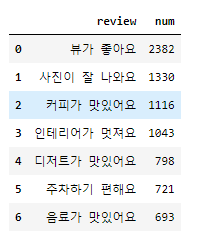

'원앤온리 리뷰'

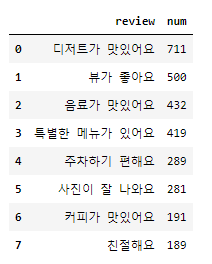

'우유부단 리뷰'

In [135]:
img_one = Image.open('/content/drive/MyDrive/jeju/pic_data/one-r.png')
img_woo = Image.open('/content/drive/MyDrive/jeju/pic_data/woo.png')
display(img_one,'원앤온리 리뷰')
display(img_woo,'우유부단 리뷰') 